In [1]:
! git clone https://github.com/ageron/handson-ml2.git

fatal: destination path 'handson-ml2' already exists and is not an empty directory.


In [2]:
import sys
import sklearn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('axes', labelsize =14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
    

### Get the data

In [3]:
housing = pd.read_csv("handson-ml2//datasets//housing//housing.csv")

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


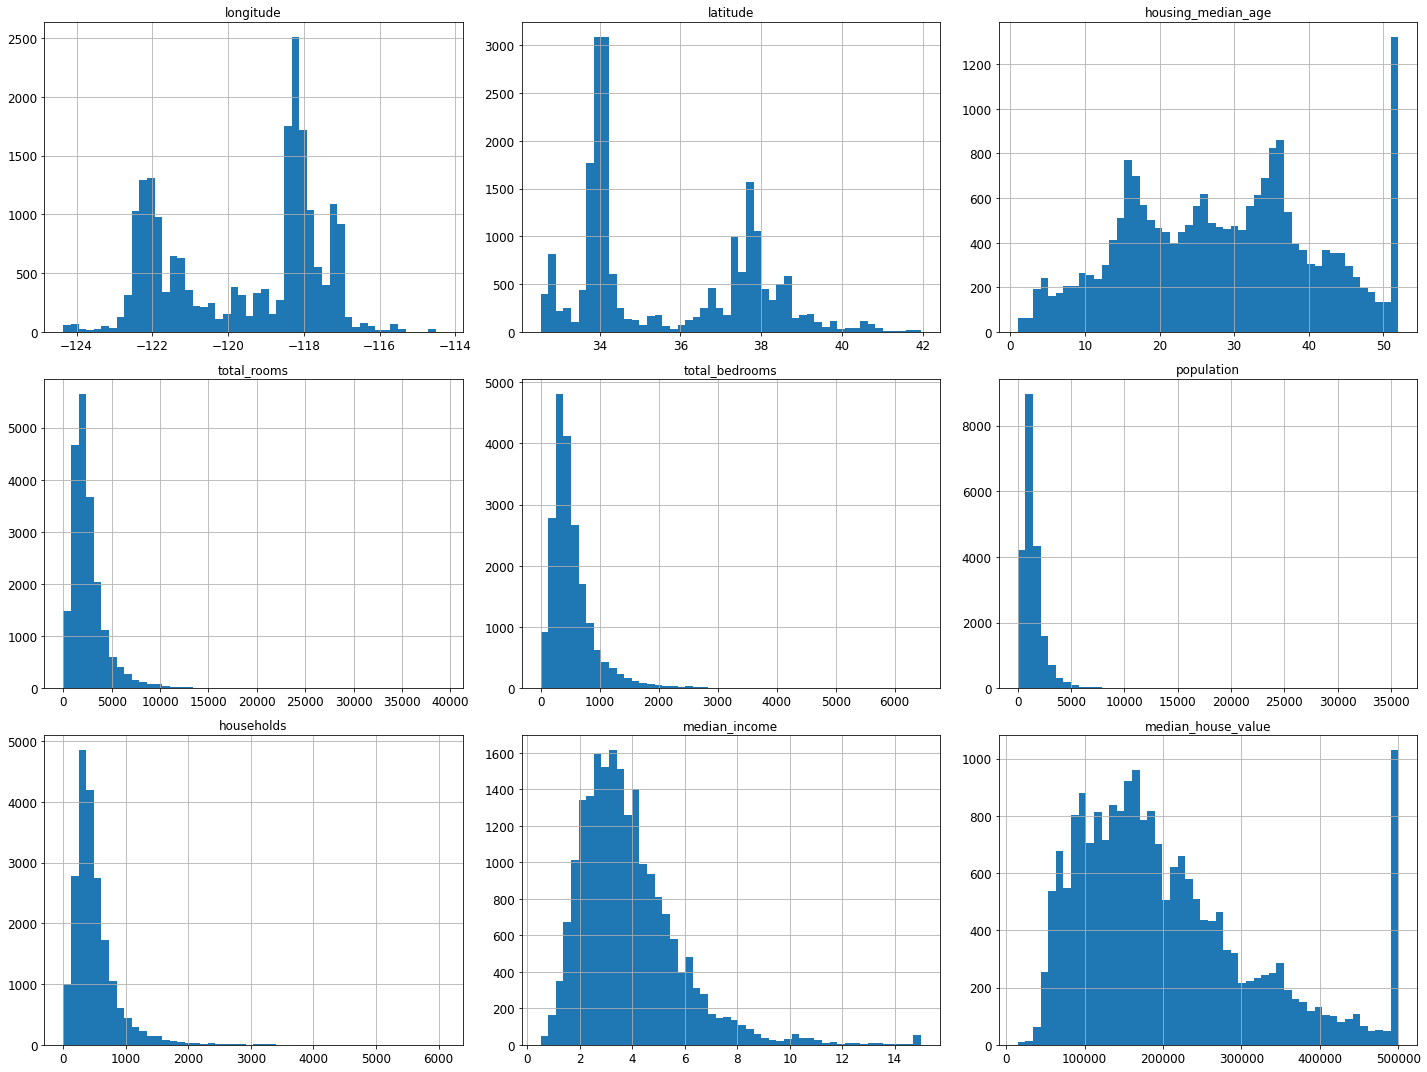

In [19]:
%matplotlib inline
housing.hist(bins = 50, figsize= (20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Create a Test Set

In [20]:
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
train_set, test_set = split_train_test(housing, 0.25)
print(len(train_set))
print(len(test_set))

15480
5160


In [23]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [25]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [26]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.25, "index")

In [27]:

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.25, "id")

In [28]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15


In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.25, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

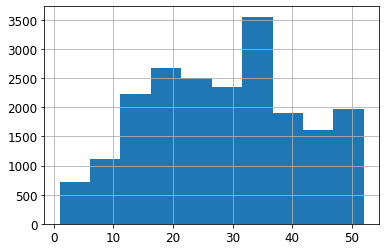

In [33]:
housing["housing_median_age"].hist()

<AxesSubplot:>

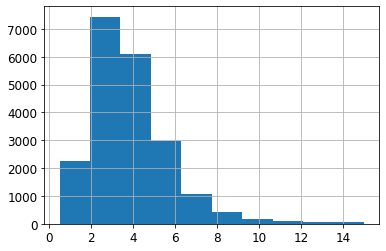

In [31]:
housing["median_income"].hist()

In [43]:
housing["income_cat"] =  pd.cut(housing["median_income"],
                               bins = [0., 1., 2.0, 3.0, 4.0, np.inf],
                               labels = [1,2,3,4,5])
housing["income_cat"].value_counts()

5    8087
4    5150
3    4946
2    2298
1     159
Name: income_cat, dtype: int64

<AxesSubplot:>

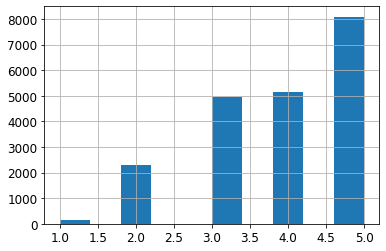

In [44]:
housing["income_cat"].hist()

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.25, random_state = 42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

5    0.391860
4    0.249612
3    0.239535
2    0.111240
1    0.007752
Name: income_cat, dtype: float64

In [46]:
housing["income_cat"].value_counts() / len(housing)

5    0.391812
4    0.249516
3    0.239632
2    0.111337
1    0.007703
Name: income_cat, dtype: float64

In [47]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size = 0.25, random_state = 42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(housing),
    "Stratified" : income_cat_proportions(strat_test_set),
    "Random" : income_cat_proportions(test_set),
    
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"]/ compare_props["Overall"] -100
compare_props["Strat. %error"] = 100*compare_props["Stratified"]/compare_props["Overall"]- 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.007703,0.007752,0.007946,3.144654,0.628931
2,0.111337,0.111240,0.112403,0.957354,-0.087032
3,0.239632,0.239535,0.242054,1.010918,-0.040437
4,0.249516,0.249612,0.253488,1.592233,0.038835
5,0.391812,0.391860,0.384109,-1.966118,0.012366


### Discover and visualize the Data to gain Insight

In [48]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


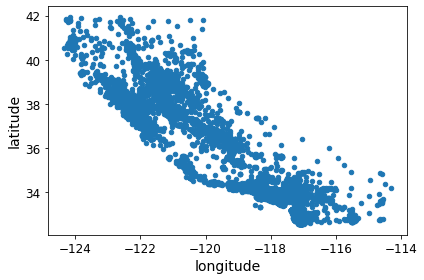

In [49]:
housing.plot(kind = "scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


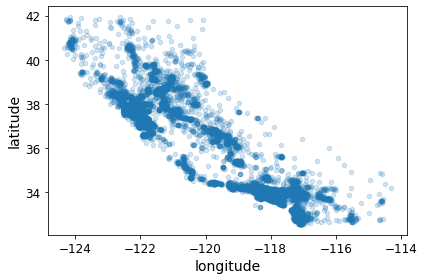

In [51]:
housing.plot(kind='scatter', x= "longitude", y="latitude", alpha= 0.2)
save_fig("better_visualization_plot")

Saving figure housing_prices_sactterplot


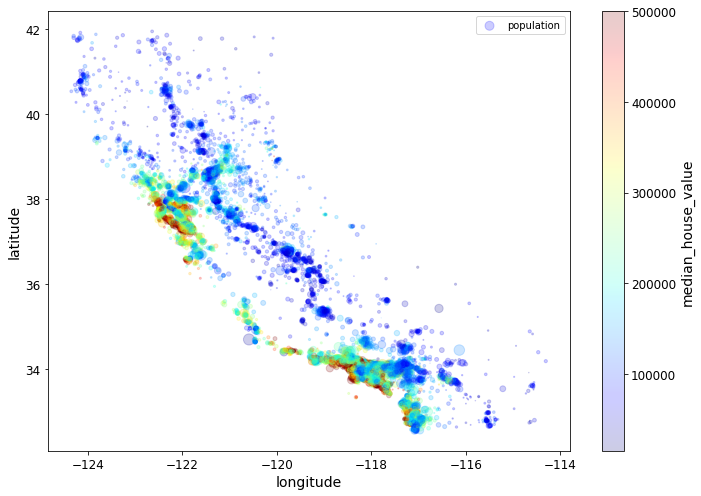

In [52]:
housing.plot(kind = "scatter", x='longitude', y='latitude', alpha = 0.2,
            s = housing["population"]/100, label = 'population', figsize=(10,7),
            c = 'median_house_value', cmap =plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()
save_fig("housing_prices_sactterplot")

Saving figure california_housing_prices_plot


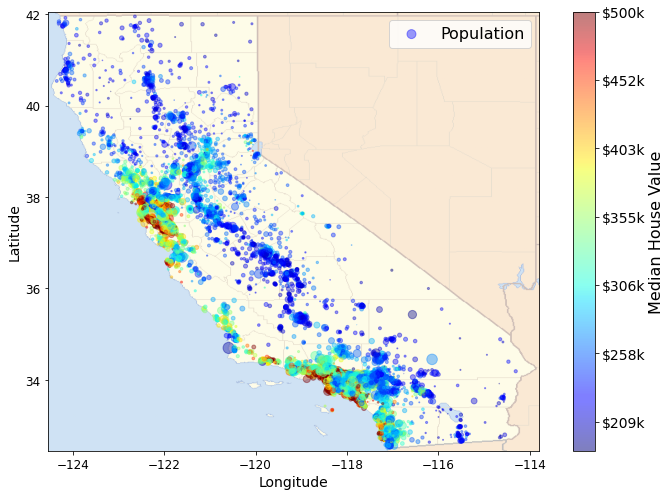

In [53]:
path = "handson-ml2//images//end_to_end_project//california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(path)

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

### Looking for correlations

In [56]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923056,-0.116116,0.049550,0.075127,0.103851,0.059868,-0.008118,-0.044736
latitude,-0.923056,1.000000,0.016848,-0.043618,-0.073244,-0.115325,-0.077551,-0.088327,-0.147312
housing_median_age,-0.116116,0.016848,1.000000,-0.359480,-0.319916,-0.299446,-0.301572,-0.120777,0.098026
total_rooms,0.049550,-0.043618,-0.359480,1.000000,0.930765,0.862674,0.918277,0.203890,0.143117
total_bedrooms,0.075127,-0.073244,-0.319916,0.930765,1.000000,0.883886,0.978881,-0.002612,0.055818
population,0.103851,-0.115325,-0.299446,0.862674,0.883886,1.000000,0.913743,0.013013,-0.017661
households,0.059868,-0.077551,-0.301572,0.918277,0.978881,0.913743,1.000000,0.019449,0.073146
median_income,-0.008118,-0.088327,-0.120777,0.203890,-0.002612,0.013013,0.019449,1.000000,0.690845
median_house_value,-0.044736,-0.147312,0.098026,0.143117,0.055818,-0.017661,0.073146,0.690845,1.000000


In [57]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690845
total_rooms           0.143117
housing_median_age    0.098026
households            0.073146
total_bedrooms        0.055818
population           -0.017661
longitude            -0.044736
latitude             -0.147312
Name: median_house_value, dtype: float64

Saving figure sactter_matrix_plot


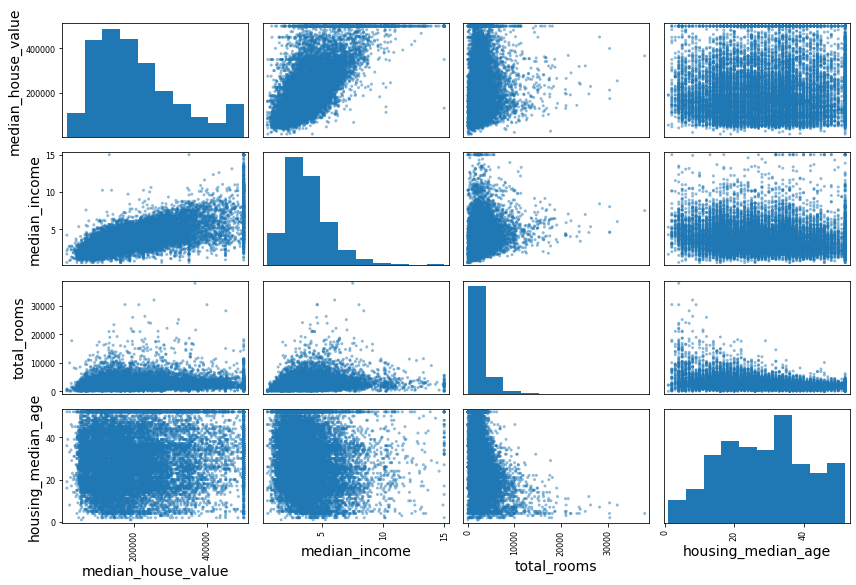

In [58]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
             "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("sactter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


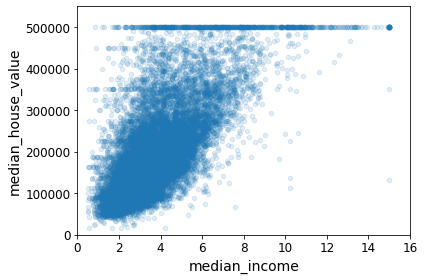

In [61]:
housing.plot(kind = "scatter", x="median_income", y="median_house_value", alpha = 0.13)
plt.axis([0,16,0, 550000])
save_fig("income_vs_house_value_scatterplot")

### Experimenting with Attribute Combinations

In [62]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [63]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690845
rooms_per_household         0.149113
total_rooms                 0.143117
housing_median_age          0.098026
households                  0.073146
total_bedrooms              0.055818
population                 -0.017661
population_per_household   -0.021714
longitude                  -0.044736
latitude                   -0.147312
bedrooms_per_room          -0.260034
Name: median_house_value, dtype: float64

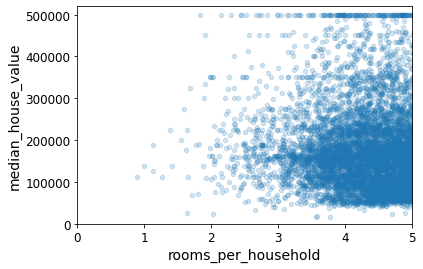

In [64]:
housing.plot(kind='scatter', x = "rooms_per_household", y="median_house_value", alpha = 0.2)
plt.axis([0,5,0,520000])
plt.show()

In [65]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,15480.000000,15480.000000,15480.000000,15480.000000,15338.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15338.000000,15480.000000
mean,-119.590413,35.659526,28.648320,2629.930491,536.080584,1416.232946,497.226938,3.873696,206424.484432,5.450589,0.212676,3.106714
std,2.008425,2.147270,12.583709,2173.779724,420.021517,1095.048289,381.031874,1.903871,115695.346751,2.614836,0.057801,11.967403
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.750000
25%,-121.810000,33.930000,18.000000,1447.000000,295.000000,782.000000,278.000000,2.563850,118500.000000,4.447368,0.175223,2.428571
50%,-118.535000,34.270000,29.000000,2115.000000,433.000000,1157.000000,407.000000,3.543550,179300.000000,5.237784,0.203087,2.812500
75%,-118.010000,37.720000,37.000000,3127.000000,644.750000,1715.000000,601.000000,4.737650,264100.000000,6.069344,0.239360,3.285714
max,-114.310000,41.950000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### prepare the Data for Machine Learning Algorithms

In [66]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [67]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND,5
20125,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,<1H OCEAN,3
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,INLAND,3
5236,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,<1H OCEAN,3
8915,-118.46,34.03,52.0,523.0,NaN,317.0,130.0,2.2794,<1H OCEAN,3


In [68]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [69]:
sample_incomplete_rows.drop("total_bedrooms", axis =1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
5990,-117.73,34.10,37.0,3457.0,1344.0,530.0,5.8891,INLAND,5
20125,-118.80,34.41,45.0,1610.0,1148.0,347.0,2.7000,<1H OCEAN,3
10033,-121.08,39.22,30.0,2188.0,1033.0,437.0,2.1419,INLAND,3
5236,-118.23,33.94,36.0,1110.0,1417.0,302.0,2.3333,<1H OCEAN,3
8915,-118.46,34.03,52.0,523.0,317.0,130.0,2.2794,<1H OCEAN,3


In [70]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace= True)

In [71]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5990,-117.73,34.10,37.0,3457.0,433.0,1344.0,530.0,5.8891,INLAND,5
20125,-118.80,34.41,45.0,1610.0,433.0,1148.0,347.0,2.7000,<1H OCEAN,3
10033,-121.08,39.22,30.0,2188.0,433.0,1033.0,437.0,2.1419,INLAND,3
5236,-118.23,33.94,36.0,1110.0,433.0,1417.0,302.0,2.3333,<1H OCEAN,3
8915,-118.46,34.03,52.0,523.0,433.0,317.0,130.0,2.2794,<1H OCEAN,3


In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [73]:
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

SimpleImputer()

In [74]:
imputer.statistics_

array([-119.59041279,   35.65952649,   28.64832041, 2629.93049096,
        536.08058417, 1416.23294574,  497.22693798,    3.87369626,
          3.90633075])

In [76]:
housing_num.mean().values

/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_29541/1828703677.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.mean().values


array([-119.59041279,   35.65952649,   28.64832041, 2629.93049096,
        536.08058417, 1416.23294574,  497.22693798,    3.87369626])

In [77]:
X = imputer.transform(housing_num)

In [78]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing.index)

In [79]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
5990,-117.73,34.10,37.0,3457.0,536.080584,1344.0,530.0,5.8891,5.0
20125,-118.80,34.41,45.0,1610.0,536.080584,1148.0,347.0,2.7000,3.0
10033,-121.08,39.22,30.0,2188.0,536.080584,1033.0,437.0,2.1419,3.0
5236,-118.23,33.94,36.0,1110.0,536.080584,1417.0,302.0,2.3333,3.0
8915,-118.46,34.03,52.0,523.0,536.080584,317.0,130.0,2.2794,3.0


In [80]:
imputer.strategy

'mean'

In [81]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = housing_num.index)

In [82]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
3331,-122.59,38.92,15.0,1410.0,329.0,599.0,273.0,2.1953,3.0
6864,-118.14,34.05,39.0,1880.0,367.0,954.0,349.0,3.8750,4.0
8355,-118.34,33.95,33.0,1923.0,459.0,1412.0,361.0,5.4359,5.0
12082,-117.52,33.82,14.0,3776.0,580.0,1877.0,559.0,5.1365,5.0
10482,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,5.0


### Handling Text and Categorical Attributes

In [84]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(15)

,ocean_proximity
3331,INLAND
6864,<1H OCEAN
8355,<1H OCEAN
12082,INLAND
10482,<1H OCEAN
2837,INLAND
9983,INLAND
6018,<1H OCEAN
19000,INLAND
5017,<1H OCEAN


In [85]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:15]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.],
       [0.],
       [3.]])

In [86]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<15480x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15480 stored elements in Compressed Sparse Row format>

In [88]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [89]:
cat_encoder = OneHotEncoder(sparse= False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [90]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformer

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [92]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [93]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
3331,-122.59,38.92,15.0,1410.0,329.0,599.0,273.0,2.1953,INLAND,3,5.164835,2.194139
6864,-118.14,34.05,39.0,1880.0,367.0,954.0,349.0,3.875,<1H OCEAN,4,5.386819,2.733524
8355,-118.34,33.95,33.0,1923.0,459.0,1412.0,361.0,5.4359,<1H OCEAN,5,5.32687,3.911357
12082,-117.52,33.82,14.0,3776.0,580.0,1877.0,559.0,5.1365,INLAND,5,6.754919,3.357782
10482,-117.69,33.58,5.0,6678.0,1011.0,2877.0,982.0,7.5177,<1H OCEAN,5,6.800407,2.929735


In [105]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.49355075,  1.51847646, -1.0846374 , ..., -0.10928536,
        -0.07625753,  0.28985702],
       [ 0.72218774, -0.74959299,  0.82265205, ..., -0.02438846,
        -0.03118488, -0.28458233],
       [ 0.62260399, -0.79616526,  0.34582969, ..., -0.04731594,
         0.0672384 ,  0.37056988],
       ...,
       [ 0.66243749, -0.80082248,  1.22000402, ..., -0.37670963,
        -0.00248945,  0.39414242],
       [ 1.29479431, -1.34106079,  0.02794812, ...,  0.68196796,
        -0.05069888, -1.02135458],
       [ 0.58774967, -0.84273752, -1.00516701, ..., -0.77560202,
        -0.12634467,  1.66878374]])

In [106]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [107]:
housing_prepared

array([[-1.49355075,  1.51847646, -1.0846374 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72218774, -0.74959299,  0.82265205, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62260399, -0.79616526,  0.34582969, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66243749, -0.80082248,  1.22000402, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.29479431, -1.34106079,  0.02794812, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58774967, -0.84273752, -1.00516701, ...,  0.        ,
         0.        ,  1.        ]])

In [108]:
housing_prepared.shape

(15480, 17)

In [109]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [110]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])


In [111]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [112]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared


array([[-1.49355075,  1.51847646, -1.0846374 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72218774, -0.74959299,  0.82265205, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62260399, -0.79616526,  0.34582969, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66243749, -0.80082248,  1.22000402, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.29479431, -1.34106079,  0.02794812, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58774967, -0.84273752, -1.00516701, ...,  0.        ,
         0.        ,  1.        ]])

In [113]:
np.allclose(housing_prepared, old_housing_prepared)

True

### Select and Train a Model

#### Training and Evaluating on the Training Set

In [114]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [115]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [106864. 227344. 278736. 188832. 337080. 185408. 169760. 215720. 164736.
 183816.]


In [116]:
print("Labels:", list(some_labels))

Labels: [75000.0, 236400.0, 194100.0, 215000.0, 330000.0, 79400.0, 300000.0, 125900.0, 140100.0, 133300.0]


In [117]:
some_data_prepared

array([[-1.49355075e+00,  1.51847646e+00, -1.08463740e+00,
        -5.61220570e-01, -4.95316860e-01, -7.46322652e-01,
        -5.88491925e-01, -8.81598997e-01, -8.49844815e-01,
        -1.09285359e-01, -7.62575348e-02,  2.89857017e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.22187739e-01, -7.49592989e-01,  8.22652054e-01,
        -3.45000327e-01, -4.04424511e-01, -4.22125564e-01,
        -3.89027103e-01,  6.84806191e-04,  8.78314314e-02,
        -2.43884615e-02, -3.11848824e-02, -2.84582333e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.22603987e-01, -7.96165257e-01,  3.45829691e-01,
        -3.25218475e-01, -1.84369351e-01, -3.86565826e-03,
        -3.57532657e-01,  8.20567397e-01,  1.02550768e+00,
        -4.73159443e-02,  6.72383976e-02,  3.70569882e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [118]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67873.37613697247

In [119]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49190.85432816538

In [120]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [121]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [122]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [127]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Max:", scores.max())
    print("Min:", scores.min())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68934.96371125 73371.51390888 70837.84192244 73335.37900278
 69203.62138805 74160.09465473 72522.5294526  70194.09811367
 70941.08363883 74739.52252442]
Mean: 71824.06483176355
Max: 74739.52252442007
Min: 68934.96371124599
Standard deviation: 1968.4045044182237


In [128]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [67057.10390305 70085.53728832 68342.05850083 68451.53296459
 68516.59712676 69543.31752944 69073.41751892 63754.267618
 68686.84447694 67951.43355751]
Mean: 68146.21104843631
Max: 70085.53728832275
Min: 63754.26761799913
Standard deviation: 1662.7360708262813


In [129]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=50, random_state=42)

In [130]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19372.089677229633

In [131]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50885.8371665  52110.05965555 51335.05679335 50451.35034169
 50418.91263093]
Mean: 51040.24331760341
Max: 52110.05965555003
Min: 50418.91263092645
Standard deviation: 630.5727557070868


In [132]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68146.211048
std       1752.677711
min      63754.267618
25%      68049.089793
50%      68484.065046
75%      68976.774258
max      70085.537288
dtype: float64

In [133]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

108564.252155316

### Fine-Tune your Model

#### Grid Search

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 5, 10], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 5, 10]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [135]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [136]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=10, random_state=42)

In [137]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64979.674782098395 {'max_features': 2, 'n_estimators': 3}
59617.563475727286 {'max_features': 2, 'n_estimators': 5}
56069.18030669949 {'max_features': 2, 'n_estimators': 10}
61530.66829055334 {'max_features': 4, 'n_estimators': 3}
56962.91164533149 {'max_features': 4, 'n_estimators': 5}
53808.5013944144 {'max_features': 4, 'n_estimators': 10}
59615.41726028518 {'max_features': 6, 'n_estimators': 3}
55875.481486649674 {'max_features': 6, 'n_estimators': 5}
53155.01924807839 {'max_features': 6, 'n_estimators': 10}
59601.09281707906 {'max_features': 8, 'n_estimators': 3}
55818.77319682863 {'max_features': 8, 'n_estimators': 5}
53442.486297782 {'max_features': 8, 'n_estimators': 10}
62830.61256177447 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54737.01122735858 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61402.59469484005 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53279.198356406545 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
6

In [138]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046813,0.012068,0.002049,0.000273,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.122947e+09,-4.059080e+09,...,-4.222358e+09,2.334476e+08,18,-1.090370e+09,-1.110118e+09,-1.148549e+09,-1.124748e+09,-1.103360e+09,-1.115429e+09,1.992804e+07
1,0.067890,0.000991,0.002878,0.000025,2,5,NaN,"{'max_features': 2, 'n_estimators': 5}",-3.559899e+09,-3.515463e+09,...,-3.554254e+09,1.495022e+08,13,-7.985722e+08,-8.025650e+08,-8.198602e+08,-8.296242e+08,-8.088870e+08,-8.119017e+08,1.141372e+07
2,0.132501,0.002591,0.005680,0.000200,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.244457e+09,-3.170328e+09,...,-3.143753e+09,1.120303e+08,9,-5.794958e+08,-5.726649e+08,-5.739792e+08,-6.036118e+08,-5.790965e+08,-5.817696e+08,1.125151e+07
3,0.069517,0.000987,0.002195,0.000252,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.841521e+09,-3.633123e+09,...,-3.786023e+09,1.054063e+08,16,-1.009986e+09,-9.938987e+08,-9.822244e+08,-1.028877e+09,-9.850291e+08,-1.000003e+09,1.738362e+07
4,0.115562,0.002429,0.003441,0.000277,4,5,NaN,"{'max_features': 4, 'n_estimators': 5}",-3.160811e+09,-3.226953e+09,...,-3.244773e+09,7.201979e+07,10,-7.200752e+08,-7.415425e+08,-7.089340e+08,-7.715313e+08,-7.344146e+08,-7.352995e+08,2.135146e+07
5,0.223973,0.002484,0.006309,0.000284,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.860750e+09,-2.936602e+09,...,-2.895355e+09,8.333859e+07,5,-5.218956e+08,-5.305847e+08,-5.128016e+08,-5.429986e+08,-5.502284e+08,-5.317018e+08,1.360501e+07
6,0.093800,0.000708,0.001881,0.000032,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.447005e+09,-3.616027e+09,...,-3.553998e+09,1.652456e+08,12,-9.689263e+08,-9.488421e+08,-9.212943e+08,-9.341387e+08,-9.515235e+08,-9.449450e+08,1.618454e+07
7,0.155529,0.000915,0.002903,0.000037,6,5,NaN,"{'max_features': 6, 'n_estimators': 5}",-3.003854e+09,-3.258725e+09,...,-3.122069e+09,1.441128e+08,8,-6.912436e+08,-7.057331e+08,-6.949436e+08,-7.028363e+08,-7.197324e+08,-7.028978e+08,9.904912e+06
8,0.303359,0.002297,0.005650,0.000005,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.712398e+09,-2.926372e+09,...,-2.825456e+09,1.157973e+08,1,-5.034677e+08,-5.184078e+08,-5.156681e+08,-5.195854e+08,-5.339997e+08,-5.182257e+08,9.747201e+06
9,0.120778,0.001847,0.001860,0.000007,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.480987e+09,-3.826858e+09,...,-3.552290e+09,1.746317e+08,11,-9.466346e+08,-9.721454e+08,-9.292088e+08,-9.304985e+08,-9.161374e+08,-9.389249e+08,1.922353e+07


### Randomized Search

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fccb3322610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcc601862b0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [140]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50112.93695274491 {'max_features': 7, 'n_estimators': 180}
51928.41061047598 {'max_features': 5, 'n_estimators': 15}
51164.100662834455 {'max_features': 3, 'n_estimators': 72}
51342.791775032856 {'max_features': 5, 'n_estimators': 21}
50228.9740654214 {'max_features': 7, 'n_estimators': 122}
51123.05921684195 {'max_features': 3, 'n_estimators': 75}
51026.21834440261 {'max_features': 3, 'n_estimators': 88}
50293.14870101845 {'max_features': 5, 'n_estimators': 100}
50873.95606769207 {'max_features': 3, 'n_estimators': 150}
64943.71676321944 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [141]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07248248, 0.06198872, 0.04595529, 0.01807784, 0.01859312,
       0.01933602, 0.01651501, 0.25607642, 0.12287012, 0.0708158 ,
       0.10904843, 0.04684047, 0.01588234, 0.11739256, 0.00033934,
       0.00306366, 0.00472237])

In [142]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2560764180611806, 'median_income'),
 (0.12287012173150894, 'income_cat'),
 (0.11739256395332905, 'INLAND'),
 (0.10904843047777715, 'pop_per_hhold'),
 (0.07248248201560278, 'longitude'),
 (0.07081579527051321, 'rooms_per_hhold'),
 (0.06198872162746497, 'latitude'),
 (0.04684047033992333, 'bedrooms_per_room'),
 (0.045955292419331, 'housing_median_age'),
 (0.019336024477925474, 'population'),
 (0.018593123191206543, 'total_bedrooms'),
 (0.01807783838176102, 'total_rooms'),
 (0.01651500820656871, 'households'),
 (0.015882340024715762, '<1H OCEAN'),
 (0.004722372462533479, 'NEAR OCEAN'),
 (0.003063660346311594, 'NEAR BAY'),
 (0.00033933701234640644, 'ISLAND')]

### Evaluate your system on the Test set

In [143]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [144]:
final_rmse

51858.5813654222

In [146]:
from scipy import stats

confidence = 0.99
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([49077.98988011, 54497.48463733])

In [147]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(49077.98988010672, 54497.48463733323)

In [148]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(49079.04775062016, 54496.531948010925)

### Extra materrial

#### A full pipeline with both preparation and prediction

In [149]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([106864., 227344., 278736., 188832., 337080., 185408., 169760.,
       215720., 164736., 183816.])

### Model persistence using joblib

In [150]:
my_model = full_pipeline_with_predictor
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF


### Example SciPy distributions for RandomizedSearchCV

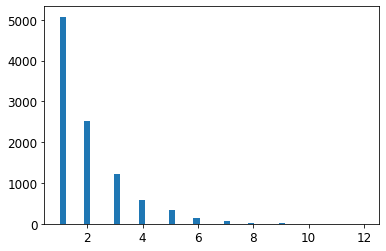

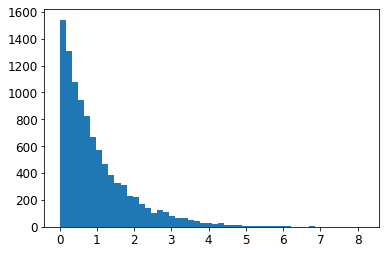

In [151]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

###  Excercise 는 제외하였습니다. (claim때, 제외해도 된다고 말씀하셨습니다)